# 선형회귀

In [87]:
import pandas as pd
import numpy as np

In [3]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [4]:
from sklearn.neighbors import KNeighborsRegressor

In [5]:
# 1 머신러닝 모델 선택
kn = KNeighborsRegressor(n_neighbors=3)

In [12]:
train_data = perch_length.reshape(-1, 1)
train_data.shape, perch_weight.shape

((56, 1), (56,))

In [13]:
kn.fit(train_data,perch_weight)
# Expected 2D array, got 1D array instead:
# 

KNeighborsRegressor(n_neighbors=3)

In [23]:
sample_data = np.array([50])
sample_data = sample_data.reshape(-1,1)
sample_data
kn.predict(sample_data)

array([[50]])

In [24]:
kn.predict([[50]])

array([1000.])

In [26]:
distance, indexs = kn.kneighbors(sample_data)

In [27]:
perch_weight[indexs]

array([[1000., 1000., 1000.]])

### 시각화를 통해 학습한 데이터와 실제 데이터

In [29]:
import matplotlib.pyplot as plt

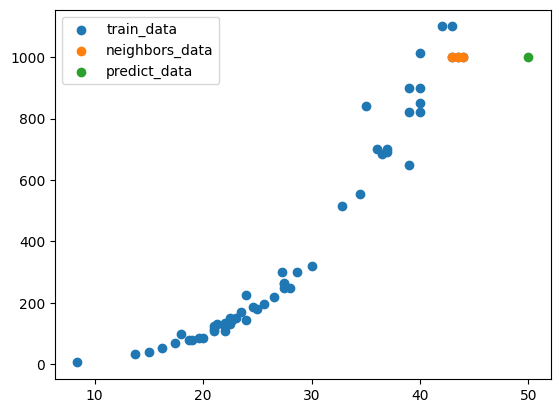

In [30]:
plt.scatter(perch_length,perch_weight,label = 'train_data')
plt.scatter(perch_length[indexs],perch_weight[indexs], label='neighbors_data')
plt.scatter(50,1000,label="predict_data")
plt.legend()
plt.show()

### 길이가 100일때 무게는 얼마일까? 그리고 왜 그럴까?

In [34]:
kn.predict([[100]])
_, indexs = kn.kneighbors([[100]])

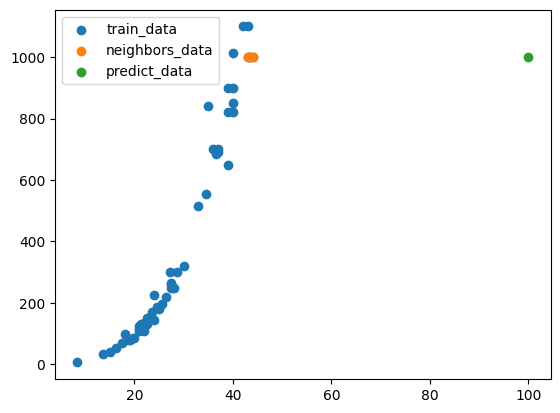

In [35]:
plt.scatter(perch_length,perch_weight,label = 'train_data')
plt.scatter(perch_length[indexs],perch_weight[indexs], label='neighbors_data')
plt.scatter(100,1000,label="predict_data")
plt.legend()
plt.show()

# LinearRegression
    선형의 방적식을 구하는 알고리즘.. (근사치) 실제값과 구한 직선의 방정식들의 오차가 최소가 되는 식을 구함
    y = ax + b

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
# 모델객체 생성
lr = LinearRegression()

In [39]:
# 학습
lr.fit(train_data, perch_weight)

LinearRegression()

In [46]:
# 예측
lr.predict([[5]]), lr.predict([[50]])

(array([-463.38567841]), array([1198.84124015]))

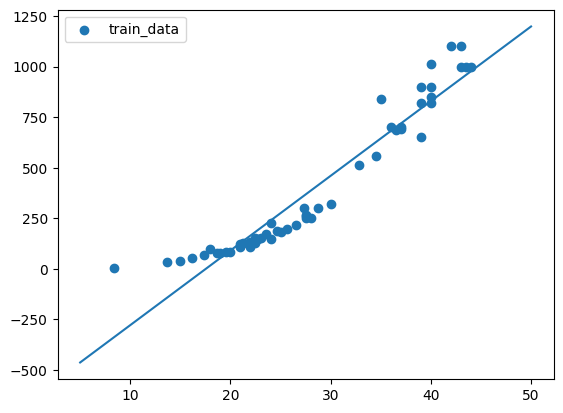

In [54]:
# 선형회귀의  시각화
plt.scatter(perch_length,perch_weight,label = 'train_data')
# x :  10 부터 50까지 직선을 그린다.
plt.plot([5,50],[-463.38567841,1198.84124015])
plt.legend()
plt.show()

# 단항식 - > 다항식
    y = ax2+ bx + c
    패턴이나 기타 다른 수학적 또는 알고리즘의 변경없이 다항식으로 변환

In [57]:
train_poly =  np.column_stack((train_data**2, train_data))

In [58]:
train_poly.shape

(56, 2)

In [59]:
lr = LinearRegression()
lr.fit(train_poly, perch_weight)

LinearRegression()

# 길이가 5일때 무게를 예측..  다항회귀를 이용해서 - 데이터가 다항.. 예측값도 같이 맞춰줘야함

In [62]:
# lr.predict([[5]])
# X has 1 features, but LinearRegression is expecting 2 features as input
lr.predict([[5**2, 5]])

array([45.07440927])

In [63]:
print(lr.coef_) # 기울기  
print(lr.intercept_) # 절편
# y =ax2 + bx + c

[  1.02094922 -22.4189282 ]
131.6453196989595


In [69]:
point = np.arange(5,51)
point_poly = np.column_stack((point**2,point))
point_poly_predict = lr.predict(point_poly)

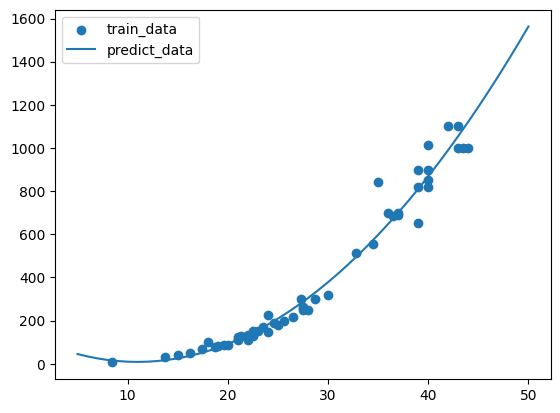

In [70]:
# 다항식의 선형회귀의  시각화
point = np.arange(5,51)
plt.scatter(perch_length,perch_weight,label = 'train_data')
# x :  10 부터 50까지 직선을 그린다.
plt.plot(point,point_poly_predict,label = 'predict_data')
plt.legend()
plt.show()

# 과적합을 확인...
    훈련용 VS 학습용 데이터 분리해서 다항식으로 만들어서 score를 확인한후.. 과적합 유무 판단

In [71]:
# 데이터 분리(잘섞어서 분리) 7:3
# 1 파이썬 문법을 이용
# 2 사이킷런에서 제공하는 메소드를 이용
from sklearn.model_selection import train_test_split

In [85]:
x_train,x_test,y_train,y_test = train_test_split(train_poly, perch_weight,test_size=0.3,random_state=2)
lr = LinearRegression()
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

0.961602279193106
0.987930794388881


# 다항 회귀(선형회귀의 일종) : 한개의 특성을 이용해서 2차원으로 만든
# 다중 회귀 : 여러개의 특성(컬럼)을 사용한 선형회귀
    특성공학 : 기존의 특성을 사용해서 새로운 특성을 뽑아내는 작업
    길이 x 높이

In [92]:
url = 'https://raw.githubusercontent.com/leekyuyoung20221226/python/main/data/perch.csv'
df = pd.read_csv(url)
df.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [111]:
# 데이터 분리
x_train,x_test,y_train,y_test =  train_test_split(df,perch_weight,test_size=0.3,random_state=20)

In [112]:
# 소용없음 : 특성을 여러개 발굴했어도 일반 선형모델을 구현하면 과적합 발생 확률이 높고
# 다중회귀의 특성공학을 이용해서 과적합을 해결
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train), lr.score(x_test,y_test)

(0.9347353787522237, 0.9495949621349069)

In [113]:
from sklearn.preprocessing import PolynomialFeatures

In [114]:
# (길이, 두께, 높이, 1) 선형방정식의 절편은 항상 1인 특성과 곱해지는 성질
# 사이킷런의 선형모델 자동으로 절편을 추가하므로 굳이 특성을 만들때 (길이, 두께, 높이, 1) 필요가 없다
poly =  PolynomialFeatures(include_bias=False)
poly.fit(x_train) 
train_poly = poly.transform(x_train)
test_poly = poly.transform(x_test)
train_poly.shape, test_poly.shape

((39, 9), (17, 9))

In [115]:
poly.get_feature_names_out()

array(['length', ' height', ' width', 'length^2', 'length  height',
       'length  width', ' height^2', ' height  width', ' width^2'],
      dtype=object)

In [116]:
lr = LinearRegression()
lr.fit(train_poly,y_train)
lr.score(train_poly,y_train),  lr.score(test_poly,y_test)

(0.9906886040003662, 0.9842197686560799)

In [118]:
# 다중회귀(선형회귀)  기본이 degree=2

In [120]:
poly =  PolynomialFeatures(degree=5, include_bias=False)
poly.fit(x_train) 
train_poly = poly.transform(x_train)
test_poly = poly.transform(x_test)
print(train_poly.shape, test_poly.shape, len(df))
############################################
lr =  LinearRegression()
#훈련데이터로 학습
lr.fit(train_poly,y_train)
# 훈련데이터 스코어, 검증데이터 스코어
lr.score(train_poly,y_train), lr.score(test_poly,y_test)

(39, 55) (17, 55) 56


(0.9999999999999459, -387.6524269489269)

# 규제적용전 표준화

In [122]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly) # 적용할 데이터의 형태나 정보를 적용하고
train_poly_scaled = ss.transform(train_poly) # 실제 데이터 변환
test_poly_scaled = ss.transform(test_poly) # 실제 데이터 변환

# 규제 : 과도한 학습이 안되게 수치를 임의로 조정
    릿지 vs 라쏘
    릿지 : 머신러닝(선형회귀에서 규제를 적용한 ) 계수(오차)를 제곱한 값을 이용해서 규제
    라쏘 : 머신러닝(선형회귀에서 규제를 적용한 ) 계수(오차)를 절대값 값을 이용해서 규제

In [123]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_poly_scaled,y_train)
print(ridge.score(train_poly_scaled,y_train), ridge.score(test_poly_scaled,y_test))

0.9894009402423172 0.9878434882536237


In [ ]:
# 과적합 발생하면.... 
# 기존에는 모델을 더 복잡하게 하거나. 다른 방법  다중->다항... 특성좀더 찾는 행위
# 규제알고리즘을 적용해서 최종적으로 해결을 시도 만약에 그래도 해결이 안되면.. 데이터에 문제..